# [**Apprentissage de la propagation d'étiquettes d'une structure complexe**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data_science_practising/blob/main/Sklearn/examples/1_14_semi_supervised/plot_label_propagation_structure.ipynb)<br/>([_Label Propagation learning a complex structure_](https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_structure.html))

Exemple de [**`LabelPropagation`**](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html#sklearn.semi_supervised.LabelPropagation) apprenant une structure interne complexe pour démontrer "l'apprentissage de variétés". Le cercle extérieur doit être étiqueté "rouge" et le cercle intérieur "bleu". Parce que les deux groupes d'étiquettes se trouvent à l'intérieur de leur propre forme distincte, nous pouvons voir que les étiquettes se propagent correctement autour du cercle.

In [ ]:
# Authors: Clay Woolam <clay@woolam.org>
#          Andreas Mueller <amueller@ais.uni-bonn.de>
# License: BSD

Nous générons un ensemble de données avec deux cercles concentriques. De plus, une étiquette est associée à chaque échantillon de l'ensemble de données, à savoir : 0 (appartenant au cercle extérieur), 1 (appartenant au cercle intérieur) et -1 (inconnu). Ici, toutes les étiquettes sauf deux sont marquées comme inconnues.

In [1]:
import numpy as np

from sklearn.datasets import make_circles

n_samples = 200
X, y = make_circles(n_samples=n_samples, shuffle=False)
outer, inner = 0, 1
labels = np.full(n_samples, -1.0)
labels[0] = outer
labels[-1] = inner

Affichage des données brutes

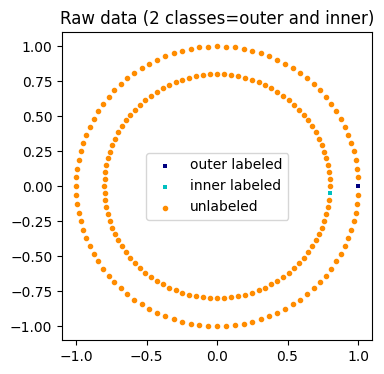

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.scatter(
    X[labels == outer, 0],
    X[labels == outer, 1],
    color="navy",
    marker="s",
    lw=0,
    label="outer labeled",
    s=10,
)
plt.scatter(
    X[labels == inner, 0],
    X[labels == inner, 1],
    color="c",
    marker="s",
    lw=0,
    label="inner labeled",
    s=10,
)
plt.scatter(
    X[labels == -1, 0],
    X[labels == -1, 1],
    color="darkorange",
    marker=".",
    label="unlabeled",
)
plt.legend(scatterpoints=1, shadow=False, loc="center")
_ = plt.title("Raw data (2 classes=outer and inner)")

L'objectif de [**`LabelSpreading`**](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html#sklearn.semi_supervised.LabelSpreading) est d'associer une étiquette à un échantillon lorsque l'étiquette est initialement inconnue.

In [3]:
from sklearn.semi_supervised import LabelSpreading

label_spread = LabelSpreading(kernel="knn", alpha=0.8)
label_spread.fit(X, labels)

LabelSpreading(alpha=0.8, kernel='knn')

Nous pouvons à présent vérifier quelles étiquettes ont été associées à chaque échantillon lorsque l'étiquette était inconnue.

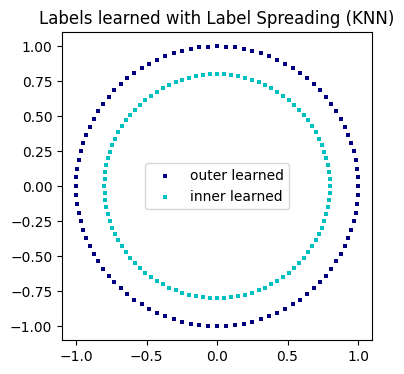

In [4]:
output_labels = label_spread.transduction_
output_label_array = np.asarray(output_labels)
outer_numbers = np.where(output_label_array == outer)[0]
inner_numbers = np.where(output_label_array == inner)[0]

plt.figure(figsize=(4, 4))
plt.scatter(
    X[outer_numbers, 0],
    X[outer_numbers, 1],
    color="navy",
    marker="s",
    lw=0,
    s=10,
    label="outer learned",
)
plt.scatter(
    X[inner_numbers, 0],
    X[inner_numbers, 1],
    color="c",
    marker="s",
    lw=0,
    s=10,
    label="inner learned",
)
plt.legend(scatterpoints=1, shadow=False, loc="center")
plt.title("Labels learned with Label Spreading (KNN)")
plt.show()